# Your name: John Lehne
## Assignment Name: CA03 - Decision Trees

In [37]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#read data using URL
url = 'https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true' 
data = pd.read_csv(url, encoding = "ISO-8859-1")

#making sure data was read correctly
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


#Data Quality Analysis

In [39]:
# Number of total rows and columns
data.shape

(48842, 11)

In [40]:
# Number of non-null values for each column
data.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [41]:
# Number of null values for each column
data.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [42]:
# Range, column, number of non-null objects, data type, memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


#Exploratory Data Analysis

In [43]:
# The binned age column is put into a crosstab
# In the crosstab the data is normalized to get percentages of each bin
# The crosstab also allows for easy data visualization
age_bin_graph = pd.crosstab(index = data.age_bin, columns = data.y, normalize = 'index')
age_bin_graph

y,0,1
age_bin,,
a. 0-25,0.982445,0.017555
b. 26-30 & 71-100,0.861388,0.138612
c. 31-35 & 61-70,0.757292,0.242708
d. 36-40 & 56-60,0.668982,0.331018
e. 40-55,0.618062,0.381938


<function matplotlib.pyplot.show>

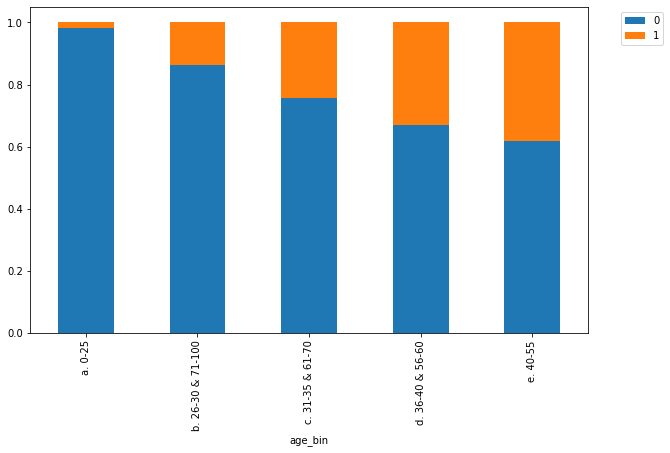

In [44]:
# The previously created crosstab is plotted using a stacked bar chart 
# Visually represents the proportions of the y column in relation to age_bin
age_bin_graph.plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left')
# 0 represents low income of <=50k and 1 represents high income of >50K
plt.show

In [45]:
# The binned capital_gain column is put into a crosstab
# In the crosstab the data is normalized to get percentages of each bin
# The crosstab also allows for easy data visualization
capital_gain_tab = pd.crosstab(index = data.capital_gl_bin, columns = data.y, normalize = 'index')
capital_gain_tab

y,0,1
capital_gl_bin,,
a. = 0,0.810653,0.189347
b. < 0,0.498685,0.501315
c. > 0,0.382652,0.617348


<function matplotlib.pyplot.show>

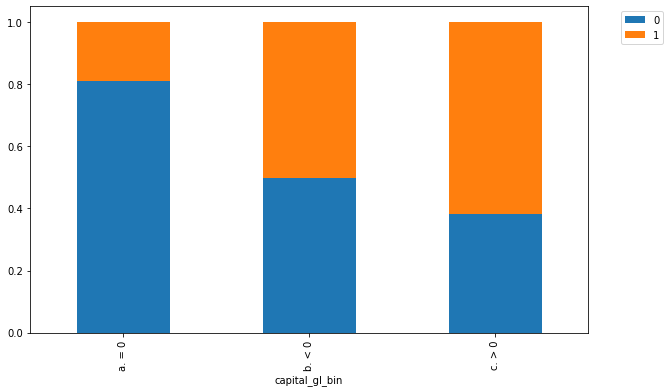

In [46]:
# The previously created crosstab is plotted using a stacked bar chart 
# Visually represents the proportions of the y column in relation to capital_gain
capital_gain_tab.plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left')
# 0 represents low income of <=50k and 1 represents high income of >50K
plt.show

In [47]:
# The binned education column is put into a crosstab
# In the crosstab the data is normalized to get percentages of each bin
# The crosstab also allows for easy data visualization
education_tab = pd.crosstab(index = data.education_bin, columns = data.y, normalize = 'index')
education_tab

y,0,1
education_bin,,
a. Low,0.942884,0.057116
b. Mid,0.818593,0.181407
c. Bachelors,0.587165,0.412835
d. Masters,0.450884,0.549116
e. High,0.266106,0.733894


<function matplotlib.pyplot.show>

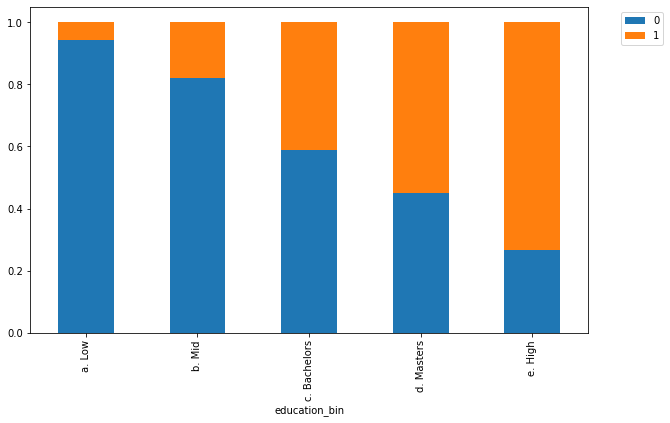

In [48]:
# The previously created crosstab is plotted using a stacked bar chart 
# Visually represents the proportions of the y column in relation to education
education_tab.plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left')
# 0 represents low income of <=50k and 1 represents high income of >50K
plt.show

In [49]:
# The binned hours_per_week column is put into a crosstab
# In the crosstab the data is normalized to get percentages of each bin
# The crosstab also allows for easy data visualization
hours_tab = pd.crosstab(index = data.hours_per_week_bin, columns = data.y, normalize = 'index')
hours_tab

y,0,1
hours_per_week_bin,,
a. 0-30,0.933002,0.066998
b. 31-40,0.796576,0.203424
c. 71-100,0.655039,0.344961
d. 41-50 & 61-70,0.607801,0.392199
e. 51-60,0.567970,0.432030


<function matplotlib.pyplot.show>

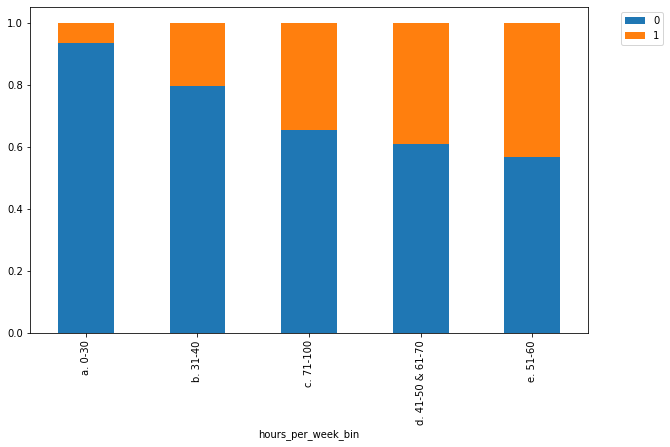

In [50]:
# The previously created crosstab is plotted using a stacked bar chart 
# Visually represents the proportions of the y column in relation to hours per week
hours_tab.plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left')
# 0 represents low income of <=50k and 1 represents high income of >50K
plt.show

In [51]:
# The binned marriage status column is put into a crosstab
# In the crosstab the data is normalized to get percentages of each bin
# The crosstab also allows for easy data visualization
marriage_tab = pd.crosstab(index = data.msr_bin, columns = data.y, normalize = 'index')
marriage_tab

y,0,1
msr_bin,,
a. Low,0.983893,0.016107
b. Mid,0.900933,0.099067
c. High,0.549190,0.450810


<function matplotlib.pyplot.show>

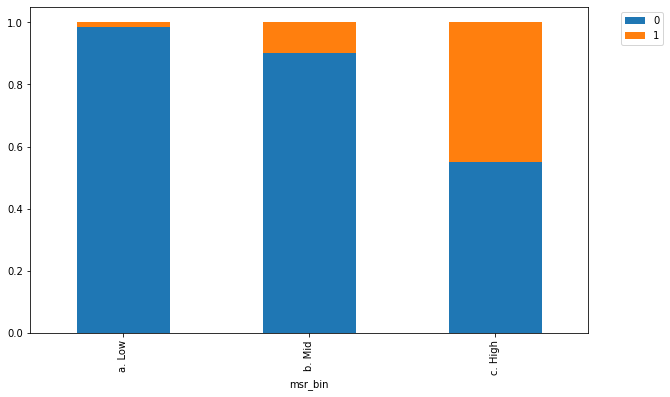

In [52]:
# The previously created crosstab is plotted using a stacked bar chart 
# Visually represents the proportions of the y column in relation to marriage status
marriage_tab.plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left')
# 0 represents low income of <=50k and 1 represents high income of >50K
plt.show

In [53]:
# The binned occupation column is put into a crosstab
# In the crosstab the data is normalized to get percentages of each bin
# The crosstab also allows for easy data visualization
occupation_tab = pd.crosstab(index = data.occupation_bin, columns = data.y, normalize = 'index')
occupation_tab

y,0,1
occupation_bin,,
a. Low,0.952328,0.047672
b. Mid - Low,0.877732,0.122268
c. Mid - Mid,0.761005,0.238995
d. Mid - High,0.700288,0.299712
e. High,0.535650,0.464350


<function matplotlib.pyplot.show>

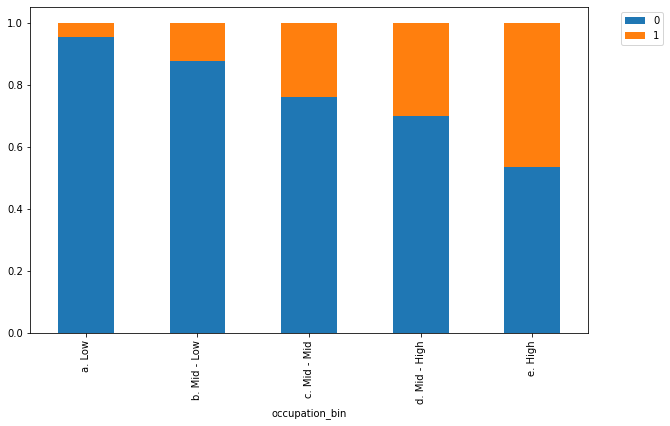

In [54]:
# The previously created crosstab is plotted using a stacked bar chart 
# Visually represents the proportions of the y column in relation to occupation
occupation_tab.plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left')
# 0 represents low income of <=50k and 1 represents high income of >50K
plt.show

In [55]:
# The binned race and sex column is put into a crosstab
# In the crosstab the data is normalized to get percentages of each bin
# The crosstab also allows for easy data visualization
race_sex_tab = pd.crosstab(index = data.race_sex_bin, columns = data.y, normalize = 'index')
race_sex_tab

y,0,1
race_sex_bin,,
a. Low,0.940332,0.059668
b. Mid,0.870936,0.129064
c. High,0.683727,0.316273


<function matplotlib.pyplot.show>

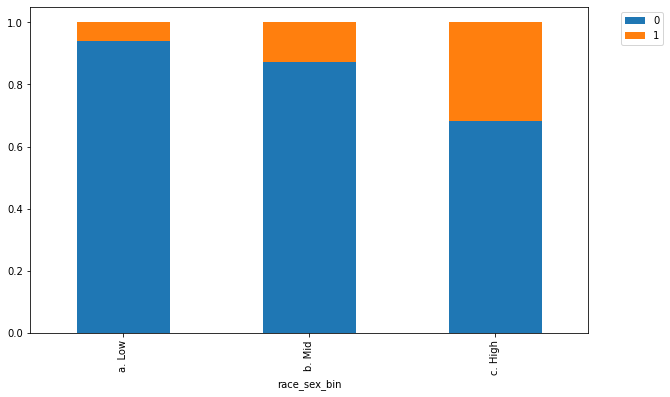

In [56]:
# The previously created crosstab is plotted using a stacked bar chart 
# Visually represents the proportions of the y column in relation to race and sex
race_sex_tab.plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left')
# 0 represents low income of <=50k and 1 represents high income of >50K
plt.show

#Build Decision Tree Classifier Models

In [57]:
# Link for helpful tips on scikit.learn decision tree algorithm: https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

In [58]:
# Seperating data into training features and labels 
data_train = data[data.flag == 'train']
# Seperating Features
x_train = data_train.drop(columns = ['flag','y'])
# Seperating Labels
y_train = data_train.y

# Seperating data into testing features and labels
data_test = data[data.flag == 'test']
# Seperating Features
x_test = data_test.drop(columns = ['flag', 'y'])
# Seperating Labels
y_test = data_test.y

In [59]:
# One-hot-encoding variables for Decision Tree to run without error
one_hot_train = pd.get_dummies(x_train, drop_first = True)
one_hot_test = pd.get_dummies(x_test, drop_first = True)

In [60]:
# Importing necessary packages to do decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Running the decision tree classifier and setting hyperparameters
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_split = 2, random_state = 19, 
                               max_features = None, min_samples_leaf = 5) 

# Fitting the model
dtree.fit(one_hot_train, y_train)
# Getting the predictions
y_pred = dtree.predict(one_hot_test)

#Visualizing Decision Tree Using GraphViz

In [61]:
#importing packages
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

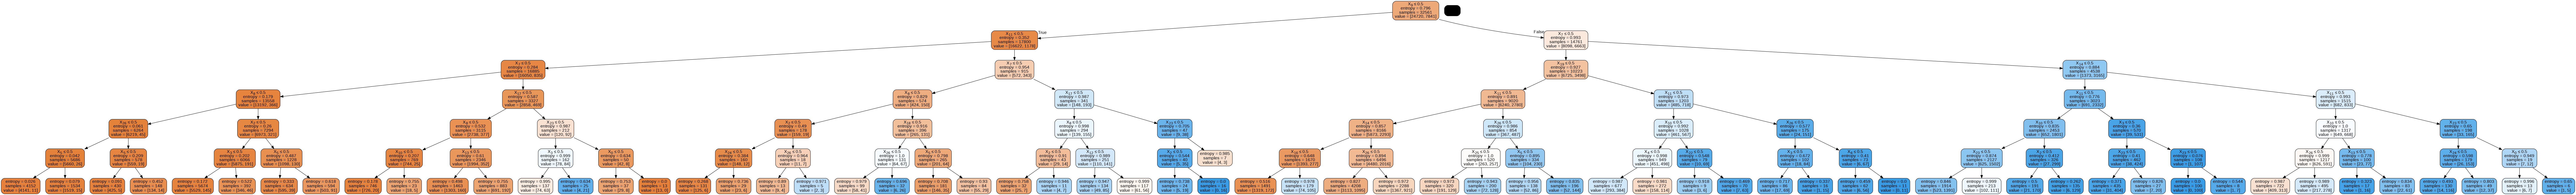

In [62]:
# First creating a place for the dot file data to be stored
dot_data = StringIO()
# Using graphviz to create the data for the visualization
# Being output into the dot file previously created -> dot_data
export_graphviz(dtree, out_file = dot_data, filled = True, rounded = True,
                special_characters = True)
# Visualizing the dot data file...may take a minute to run
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#Evaluate Decision Tree

In [63]:
# Importing packages needed for evaluation of decision tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [64]:
# Creating confusion matrix 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Showing True Negative, False Positive, False Negative, and True Positive values
print(tn, fp, fn, tp)

11616 819 1860 1986


In [65]:
# Displaying Accuracy Score
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.8354523677906762


In [66]:
# Displaying Precision Score
print('Precision:', precision_score(y_test, y_pred))

Precision: 0.7080213903743315


In [67]:
# Displaying Recall Score
print('Recall:', recall_score(y_test, y_pred))

Recall: 0.516380655226209


In [68]:
# Displaying F1 Score
print('F1_Score:', f1_score(y_test, y_pred))

F1_Score: 0.5972034280559314


In [69]:
# Displaying AUC score
print('AUC:', roc_auc_score(y_test, y_pred))

AUC: 0.7252590851523084


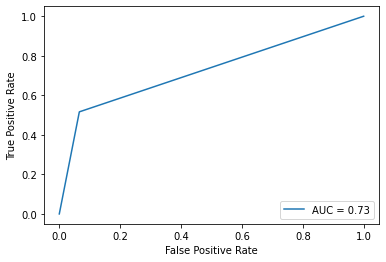

In [70]:
# Creating points for ROC Curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)
# Setting AUC to a variable
auc_score = metrics.auc(fpr, tpr)
# Plotting the ROC Curve and returning a visualization
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc_score)
display.plot()
plt.show()

## Tuning Decision Tree Performance

In [71]:
# See Excel spreadsheet for manual tuning 

In [72]:
# Reading hyperparameters into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/BSAN 6070/CA03/Automated Tree Tuning.csv')
# Displaying the pandas dataframe with hyperparameters
df

,criteria,min_sample_split,min_sample_leaf,max_depth,accuracy,recall,precision,f1_score
0,entropy,2,5,3,NaN,NaN,NaN,NaN
1,entropy,2,5,6,NaN,NaN,NaN,NaN
2,entropy,2,10,3,NaN,NaN,NaN,NaN
3,entropy,7,5,3,NaN,NaN,NaN,NaN
4,gini,2,5,3,NaN,NaN,NaN,NaN
5,gini,2,5,6,NaN,NaN,NaN,NaN
6,gini,2,10,3,NaN,NaN,NaN,NaN
7,gini,7,5,3,NaN,NaN,NaN,NaN


In [73]:
# Creating for loop in order to iterate through values and have the results return 
# Iterting through rows to get index and values in the dataframe
for index, value in df.iterrows():
  # Putting the iterated values as the hyperparameters in the decision tree
  dtree = DecisionTreeClassifier(criterion = value['criteria'], max_depth = value['max_depth'], 
                                 min_samples_split = value['min_sample_split'], random_state = 19, 
                                 max_features = None, min_samples_leaf = value['min_sample_leaf']) 
  # Fitting the model
  dtree.fit(one_hot_train, y_train)
  # Getting the predictions
  y_pred = dtree.predict(one_hot_test)

  # Calculating the accuracy, recall, precision, and f1 and putting back into dataframe
  df.accuracy[index] = accuracy_score(y_test, y_pred)
  df.recall[index] = recall_score(y_test, y_pred)
  df.precision[index] = precision_score(y_test, y_pred)
  df.f1_score[index] = f1_score(y_test, y_pred)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/i

In [74]:
# Displaying automated results
df

,criteria,min_sample_split,min_sample_leaf,max_depth,accuracy,recall,precision,f1_score
0,entropy,2,5,3,0.825932,0.521061,0.668892,0.585794
1,entropy,2,5,6,0.835452,0.516381,0.708021,0.597203
2,entropy,2,10,3,0.825932,0.521061,0.668892,0.585794
3,entropy,7,5,3,0.825932,0.521061,0.668892,0.585794
4,gini,2,5,3,0.825932,0.521061,0.668892,0.585794
5,gini,2,5,6,0.833733,0.503120,0.708532,0.588414
6,gini,2,10,3,0.825932,0.521061,0.668892,0.585794
7,gini,7,5,3,0.825932,0.521061,0.668892,0.585794


## Prediction Using Decision Tree Model

In [80]:
# Creating dictionary with the one_hot_encoding for the new individual who we are predicting
one_hot_pred = {'hours_per_week_bin_b. 31-40':0, 'hours_per_week_bin_c. 71-100':0, 'hours_per_week_bin_d. 41-50 & 61-70':1,
                'hours_per_week_bin_e. 51-60':0, 'occupation_bin_b. Mid - Low':1,'occupation_bin_c. Mid - Mid':0,
                'occupation_bin_d. Mid - High':0, 'occupation_bin_e. High':0, 'msr_bin_b. Mid':0, 'msr_bin_c. High':1,
                'capital_gl_bin_b. < 0':0, 'capital_gl_bin_c. > 0':1, 'race_sex_bin_b. Mid':1, 'race_sex_bin_c. High':0,
                'education_num_bin_b. 9-12':1, 'education_num_bin_c. 13':0, 'education_num_bin_d. 14':0, 'education_num_bin_e. 15+':0,
                'education_bin_b. Mid':0, 'education_bin_c. Bachelors':0, 'education_bin_d. Masters':0, 'education_bin_e. High':1,
                'workclass_bin_b. income':1,'age_bin_b. 26-30 & 71-100':0, 'age_bin_c. 31-35 & 61-70':0, 'age_bin_d. 36-40 & 56-60':1,
                'age_bin_e. 40-55':0}

In [81]:
# Turning the dictionary for the the individual into a dataframe
pred_df = pd.DataFrame([one_hot_pred])

In [82]:
# Checking dataframe of the individual
pred_df

,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,msr_bin_b. Mid,msr_bin_c. High,capital_gl_bin_b. < 0,capital_gl_bin_c. > 0,race_sex_bin_b. Mid,race_sex_bin_c. High,education_num_bin_b. 9-12,education_num_bin_c. 13,education_num_bin_d. 14,education_num_bin_e. 15+,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_b. income,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0


In [83]:
# Using the best model to run prediction of new individual
# Running the decision tree classifier and setting hyperparameters
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_split = 2, random_state = 19, 
                               max_features = None, min_samples_leaf = 5) 

# Fitting the model
dtree.fit(one_hot_train, y_train)
# Getting the predictions and the prediction probabilities
pred = dtree.predict(pred_df)
pred_prob = dtree.predict_proba(pred_df)

In [84]:
# Displaying the prediction results
print('Prediction:',pred)
print('Prediction Probabilites [0,1]:',pred_prob)
# Using if statement to print Income Category based on prediction
if pred == 1:
  print('Predicted Income Category is >50k')
elif pred == 0:
  print('Predicted Income Category is <=50k')

Prediction: [1]
Prediction Probabilites [0,1]: [[0.36 0.64]]
Predicted Income Category is >50k
